In [1]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
# Importation du jeu de données
import pathlib
import os

2024-05-17 11:37:02.138437: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 11:37:02.138484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 11:37:02.181586: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-17 11:37:02.255815: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-05-17 11:37:06.500255: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 11:37:06.765857: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 11:37:06.766669: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

#  On load le data set

In [4]:
data_dir = pathlib.Path('data/anime_images')
print(data_dir)
print(os.path.abspath(data_dir))

data/anime_images
/home/ssea2/Desktop/IA/vision_recoperso/Projet-IA/data/anime_images


In [5]:
# Comptage du nombre d'images
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

83067


# On crée les 2 "axes" X=les images y=leurs labels

In [6]:
# Paramètres pour la création des ensembles de données
batch_size = 3
img_height = 200
img_width = 200

# Création des ensembles de données d'entraînement et de validation
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Noms de classe
class_names = val_data.class_names
print(len(class_names))

Found 83066 files belonging to 232 classes.
Using 66453 files for training.


2024-05-17 00:20:38.681038: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 83066 files belonging to 232 classes.
Using 16613 files for validation.
232


2024-05-17 00:20:43.511853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [66453]
	 [[{{node Placeholder/_4}}]]
2024-05-17 00:20:43.512150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [66453]
	 [[{{node Placeholder/_0}}]]


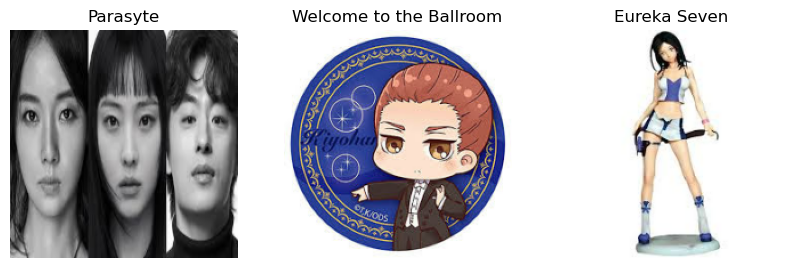

In [7]:
# Affichage des images d'exemple
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

 # initialisaton du model

In [9]:
# Définition du modèle CNN
num_classes = 231  # nombre de classes
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, 4, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 4, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 4, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, 4, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Sauvegarde des poids du modèle après l'entraînement
model.save_weights('poids_modele_cnn.weights.h5')

# Définition de l'architecture du modèle à recharger
model_reloaded = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, 4, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 4, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 4, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, 4, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

try:
    # Essayez de charger le modèle complet (architecture + poids)
    model_reloaded = tf.keras.models.load_model('model_weights.h5')
except (OSError, IOError) as e:
    print(f"Le chargement du modèle complet a échoué: {e}")
    # Sinon, compilez le modèle rechargé et chargez les poids
    model_reloaded.compile(optimizer='adam',
                           loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                           metrics=['accuracy'])
    model_reloaded.load_weights('poids_modele_cnn.weights.h5')

# Sauvegarde des poids du modèle actuel
model.save_weights('poids_modele_cnn.weights.h5')


Le chargement du modèle complet a échoué: No file or directory found at model_weights.h5


In [10]:
# Callback pour TensorBoard
logdir="logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,)

On entraine le model sur les donnée train_data/val_data, se qui nous return l'acuracy du model

In [13]:



# Entraînement du modèle
model.fit( 
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[tensorboard_callback]
)

model.save('model_weights.h5')

Epoch 1/20


   99/22151 [..............................] - ETA: 1:41:27 - loss: 5.3045 - accuracy: 0.0269

2024-05-17 00:22:50.469045: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at sparse_xent_op.cc:102 : INVALID_ARGUMENT: Received a label value of 231 which is outside the valid range of [0, 231).  Label values: 201 231 44
2024-05-17 00:22:50.469110: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Received a label value of 231 which is outside the valid range of [0, 231).  Label values: 201 231 44
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/home/ssea2/.local/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "/home/ssea2/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/home/ssea2/.local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/home/ssea2/.local/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/home/ssea2/Application/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/home/ssea2/Application/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
      handle._run()
    File "/home/ssea2/Application/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/ssea2/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "/home/ssea2/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "/home/ssea2/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/home/ssea2/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/home/ssea2/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "/home/ssea2/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "/home/ssea2/.local/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/ssea2/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "/home/ssea2/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "/home/ssea2/.local/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/ssea2/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/ssea2/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/ssea2/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_56256/12090404.py", line 2, in <module>
      model.fit(
    File "/home/ssea2/Application/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ssea2/Application/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/ssea2/Application/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/ssea2/Application/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ssea2/Application/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/ssea2/Application/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/ssea2/Application/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "/home/ssea2/Application/anaconda3/lib/python3.11/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/ssea2/Application/anaconda3/lib/python3.11/site-packages/keras/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/ssea2/Application/anaconda3/lib/python3.11/site-packages/keras/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/ssea2/Application/anaconda3/lib/python3.11/site-packages/keras/losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/home/ssea2/Application/anaconda3/lib/python3.11/site-packages/keras/backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 231 which is outside the valid range of [0, 231).  Label values: 201 231 44
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1871]

In [ ]:
"""
# Fonction pour afficher les filtres de convolution
def display_filter(model, layer_name):
    layer = model.get_layer(layer_name)
    filter, bias= layer.get_weights()
    dim = filter.shape[3]
    print(f'{layer_name} | Filter Shape: {filter.shape} Bias Shape: {bias.shape}')
    print(f'Dimension {dim}')
    f_min, f_max = filter.min(), filter.max()
    filter = (filter - f_min) / (f_max - f_min)
    print(filter.shape)
    fig= plt.figure(figsize=(30,30))
    for i in range(dim):
        ax = fig.add_subplot(dim/2,dim/2,i+1)
        ax.axis('off')
        try:
            ax.imshow(filter[:,:,:,i])
        except:
            ax.imshow(filter[:,:,:,i][0])

# Affichage des filtres de convolution
display_filter(model,f'conv2d_{num}')"""

"\n# Fonction pour afficher les filtres de convolution\ndef display_filter(model, layer_name):\n    layer = model.get_layer(layer_name)\n    filter, bias= layer.get_weights()\n    dim = filter.shape[3]\n    print(f'{layer_name} | Filter Shape: {filter.shape} Bias Shape: {bias.shape}')\n    print(f'Dimension {dim}')\n    f_min, f_max = filter.min(), filter.max()\n    filter = (filter - f_min) / (f_max - f_min)\n    print(filter.shape)\n    fig= plt.figure(figsize=(30,30))\n    for i in range(dim):\n        ax = fig.add_subplot(dim/2,dim/2,i+1)\n        ax.axis('off')\n        try:\n            ax.imshow(filter[:,:,:,i])\n        except:\n            ax.imshow(filter[:,:,:,i][0])\n\n# Affichage des filtres de convolution\ndisplay_filter(model,f'conv2d_{num}')"